In [1]:
# Import Dependencies
import csv
import pandas as pd

# Pull in Lake CSV
Lakes_CSV = pd.read_csv("../csv data/Rivers and Lakes/Lakes.csv")
Lakes_CSV.head()

,agency_cd,site_no,parameter_cd,ts_id,year_nu,month_nu,mean_va
0,USGS,7227900,62614,131778,2000,10,2899.728
1,USGS,7227900,62614,131778,2000,11,2900.714
2,USGS,7227900,62614,131778,2000,12,2900.287
3,USGS,7227900,62614,131778,2001,1,2900.105
4,USGS,7227900,62614,131778,2001,2,2900.254


In [2]:
# Pull in Rivers CSV
Rivers_CSV = pd.read_csv("../csv data/Rivers and Lakes/Rivers.csv")
Rivers_CSV.head()

,agency_cd,site_no,parameter_cd,ts_id,year_nu,month_nu,mean_va
0,USGS,7227500,65,131762,1997,10,2.513
1,USGS,7227500,65,131762,1997,11,2.384
2,USGS,7227500,65,131762,1997,12,2.441
3,USGS,7227500,65,131762,1998,1,2.583
4,USGS,7227500,65,131762,1998,2,2.488


In [3]:
# Pull in Lakes Site Joiner CSV
Lakes_Site_Joiner_CSV = pd.read_csv("../csv data/Rivers and Lakes/Lakes Site Joiner.csv")
Lakes_Site_Joiner_CSV.head()

,agency_cd,site_no,lake_name,site_loc
0,USGS,7227900,Lake Meredith,"Sanford, TX"
1,USGS,8017400,Lake Tawakoni,"Wills Point, TX"
2,USGS,8018800,Lake Fork Reservoir,"Quitman, TX"
3,USGS,8025350,Toledo Bend Reservoir,"Burkeville, TX"
4,USGS,8031400,Lake Palestine,"Frankston, TX"


In [4]:
# Pull in Rivers Site Joiner CSV
Rivers_Site_Joiner_CSV = pd.read_csv("../csv data/Rivers and Lakes/Rivers Site Joiner.csv")
Rivers_Site_Joiner_CSV.head()

,agency_cd,site_no,river_name,site_heading,site_loc
0,USGS,7227500,Canadian River,Upstream,"Amarillo, TX"
1,USGS,7228000,Canadian River,Downstream,"Canadian, TX"
2,USGS,7297910,Red River,Upstream,"Wayside, TX"
3,USGS,7308500,Red River,Downstream,"Burkburnett, TX"
4,USGS,8017410,Sabine River,Upstream,"Wills Point, TX"


In [16]:
# Remove unnecessary fields in Lake CSV
Clean_Lakes_CSV = Lakes_CSV[["site_no", "year_nu", "month_nu", "mean_va"]]
# Create Lake Groupby Object
Lakes_GB = Lakes_CSV.groupby(Lakes_CSV["site_no"])
# Check earliest year for each site number
Lakes_test_df = Lakes_GB["year_nu"].min()
Lakes_test_df

site_no
7227900    2000
8017400    1995
8018800    1995
8025350    1999
8031400    1999
8039300    2000
8052800    1997
8060500    2000
8061550    2000
8063010    2000
8064550    2000
8066190    1999
8067600    1999
8088500    1988
8092500    2000
8102000    2000
8136600    2000
8167700    1999
8206900    1999
Name: year_nu, dtype: int64

In [35]:
Test_Lakes_Site_Joiner_CSV = Lakes_Site_Joiner_CSV.set_index("site_no")
# Combine dataset with joiner table to get proper names accross multiple station numbers at same river
Test_Clean_Lakes_CSV = Clean_Lakes_CSV.join(Test_Lakes_Site_Joiner_CSV, on=["site_no"])

Test_Clean_Lakes_CSV["Date"] = Test_Clean_Lakes_CSV["year_nu"].astype(str) + "-" + Test_Clean_Lakes_CSV["month_nu"].astype(str)
Test_Clean_Lakes_CSV

,site_no,year_nu,month_nu,mean_va,agency_cd,lake_name,site_loc,Date
0,7227900,2000,10,2899.728,USGS,Lake Meredith,"Sanford, TX",2000-10
1,7227900,2000,11,2900.714,USGS,Lake Meredith,"Sanford, TX",2000-11
2,7227900,2000,12,2900.287,USGS,Lake Meredith,"Sanford, TX",2000-12
3,7227900,2001,1,2900.105,USGS,Lake Meredith,"Sanford, TX",2001-1
4,7227900,2001,2,2900.254,USGS,Lake Meredith,"Sanford, TX",2001-2
...,...,...,...,...,...,...,...,...
4336,8206900,2020,4,202.287,USGS,Choke Canyon Reservoir,"Three Rivers, TX",2020-4
4337,8206900,2020,5,201.904,USGS,Choke Canyon Reservoir,"Three Rivers, TX",2020-5
4338,8206900,2020,6,201.591,USGS,Choke Canyon Reservoir,"Three Rivers, TX",2020-6
4339,8206900,2020,7,200.886,USGS,Choke Canyon Reservoir,"Three Rivers, TX",2020-7


lake_name
Belton Lake                    AxesSubplot(0.125,0.125;0.775x0.755)
Canyon Lake                    AxesSubplot(0.125,0.125;0.775x0.755)
Cedar Creek Reservoir          AxesSubplot(0.125,0.125;0.775x0.755)
Choke Canyon Reservoir         AxesSubplot(0.125,0.125;0.775x0.755)
Lake Conroe                    AxesSubplot(0.125,0.125;0.775x0.755)
Lake Fork Reservoir            AxesSubplot(0.125,0.125;0.775x0.755)
Lake Meredith                  AxesSubplot(0.125,0.125;0.775x0.755)
Lake Palestine                 AxesSubplot(0.125,0.125;0.775x0.755)
Lake Ray Hubbard               AxesSubplot(0.125,0.125;0.775x0.755)
Lake Tawakoni                  AxesSubplot(0.125,0.125;0.775x0.755)
Lavon Lake                     AxesSubplot(0.125,0.125;0.775x0.755)
Lewisville Lake                AxesSubplot(0.125,0.125;0.775x0.755)
Livingston Reservoir           AxesSubplot(0.125,0.125;0.775x0.755)
O.H. Ivie Reservoir            AxesSubplot(0.125,0.125;0.775x0.755)
Possum Kingdom Lake            AxesSub

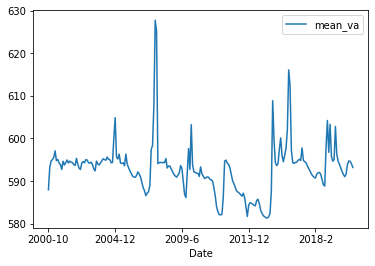

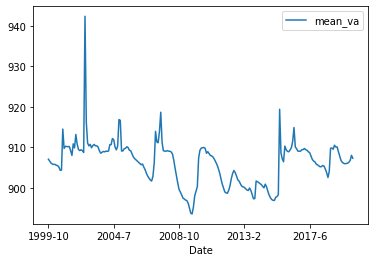

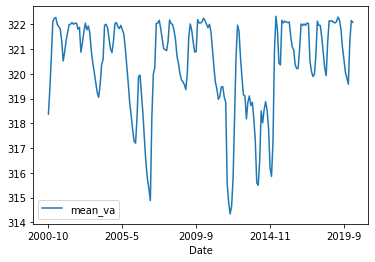

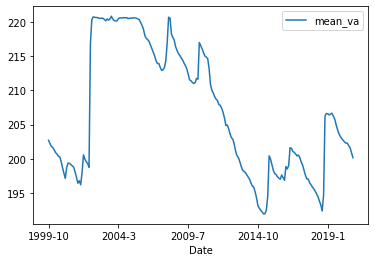

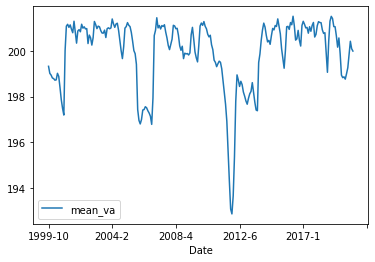

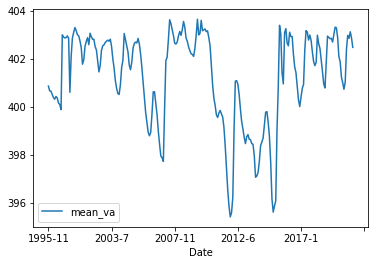

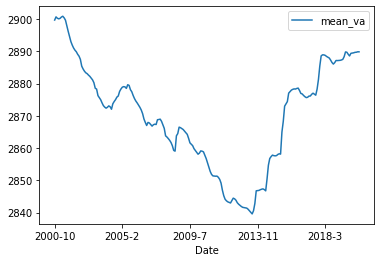

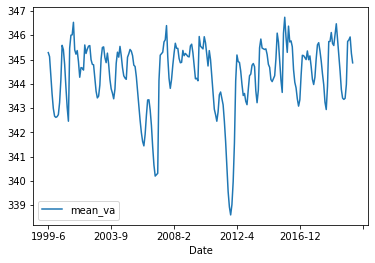

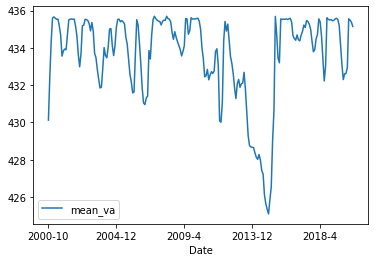

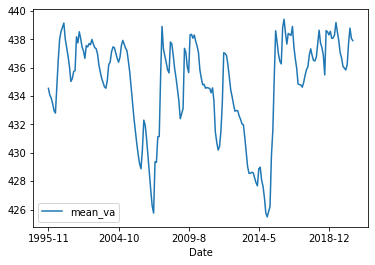

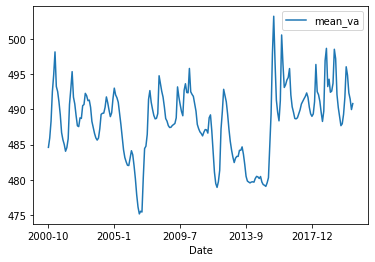

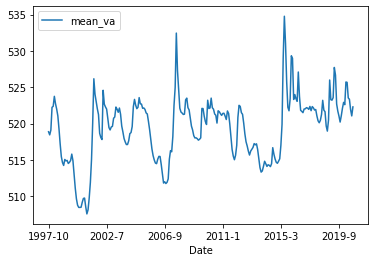

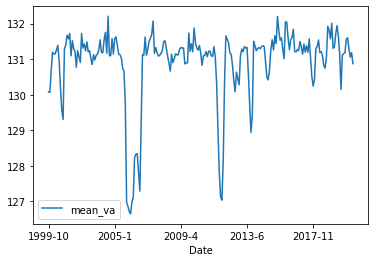

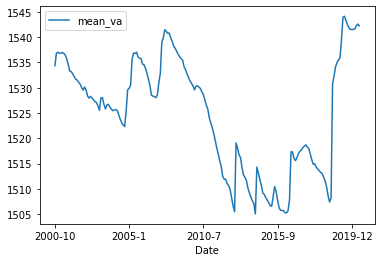

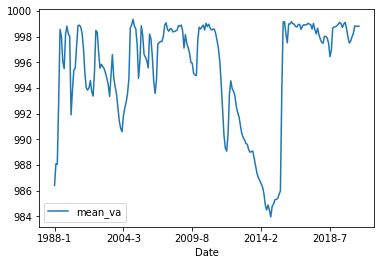

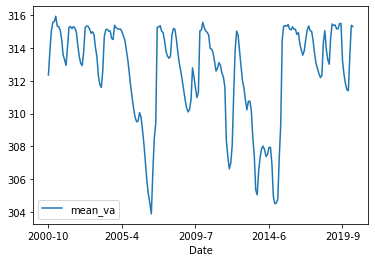

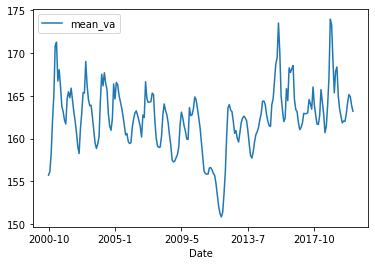

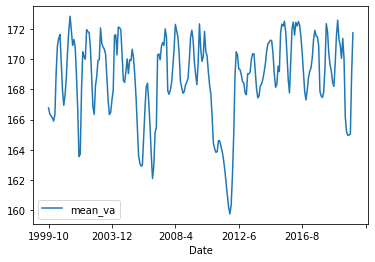

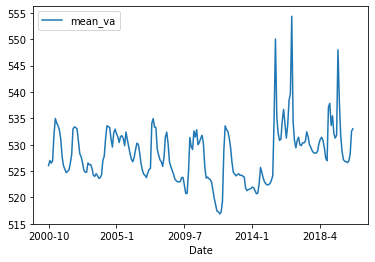

In [37]:
Lake_Plot_Test = Test_Clean_Lakes_CSV[["Date", "lake_name", "mean_va"]]
Lake_Plot_Test = Lake_Plot_Test.set_index(["Date"])
Lake_Plot_Test_GB = Lake_Plot_Test.groupby("lake_name")
Lake_Plot_Test_GB["lake_name"].min()
Lake_Plot_Test_GB.plot()

In [17]:
# Remove unnecessary fields in Rivers CSV
Clean_Rivers_CSV = Rivers_CSV[["site_no", "parameter_cd", "year_nu", "month_nu", "mean_va"]]
# Create Rivers Groupby Object
Rivers_GB = Clean_Rivers_CSV.groupby(Rivers_CSV["site_no"])
# Check earliest year for each site number
Rivers_test_df = Rivers_GB["year_nu"].min()
Rivers_test_df

site_no
7227500    1938
7228000    1964
7297910    1967
7308500    1960
8017410    1970
8030500    1960
8032000    1961
8041000    1950
8057410    1956
8067000    1938
8070000    1939
8070200    1984
8088000    1961
8116650    1967
8117995    1988
8162500    1948
8165300    1989
8176500    1934
8178000    1926
8188500    1924
8190000    1923
8211200    1966
8412500    1937
8446500    1939
Name: year_nu, dtype: int64

In [22]:
Test_Rivers_Site_Joiner_CSV = Rivers_Site_Joiner_CSV.set_index("site_no")
# Combine dataset with joiner table to get proper names accross multiple station numbers at same river
Test_Clean_Rivers_CSV = Clean_Rivers_CSV.join(Test_Rivers_Site_Joiner_CSV, on=["site_no"])
# Create Rivers Groupby Object
# Temps_GB = Clean_Temps_CSV.groupby(Clean_Temps_CSV["STATION_NAME"])
Test_Clean_Rivers_CSV["Date"] = Test_Clean_Rivers_CSV["year_nu"].astype(str) + "-" + Test_Clean_Rivers_CSV["month_nu"].astype(str)
Test_Clean_Rivers_CSV.head()

,site_no,parameter_cd,year_nu,month_nu,mean_va,agency_cd,river_name,site_heading,site_loc,Date
0,7227500,65,1997,10,2.513,USGS,Canadian River,Upstream,"Amarillo, TX",1997-10
1,7227500,65,1997,11,2.384,USGS,Canadian River,Upstream,"Amarillo, TX",1997-11
2,7227500,65,1997,12,2.441,USGS,Canadian River,Upstream,"Amarillo, TX",1997-12
3,7227500,65,1998,1,2.583,USGS,Canadian River,Upstream,"Amarillo, TX",1998-1
4,7227500,65,1998,2,2.488,USGS,Canadian River,Upstream,"Amarillo, TX",1998-2


In [24]:
Test_River_GB = Test_Clean_Rivers_CSV.groupby(Test_Clean_Rivers_CSV["river_name"])
Test_River_GB


In [29]:
Gage_Height_df = Test_Clean_Rivers_CSV.loc[Test_Clean_Rivers_CSV["parameter_cd"]==60]
Gage_Height_df = Gage_Height_df.loc[Gage_Height_df["site_heading"] == "Downstream"]
Plot_Test = Gage_Height_df[["Date", "river_name", "mean_va"]]
Plot_Test = Plot_Test.set_index(["Date"])
Plot_Test_GB = Plot_Test.groupby("river_name")
Plot_Test_GB["river_name"].min()

river_name
Brazos River              Brazos River
Canadian River          Canadian River
Colorado River          Colorado River
Guadalupe River        Guadalupe River
Neches River              Neches River
Nueces River              Nueces River
Pecos River                Pecos River
Red River                    Red River
Sabine River              Sabine River
San Antonio River    San Antonio River
San Jacinto River    San Jacinto River
Trinity River            Trinity River
Name: river_name, dtype: object

In [ ]:
import matplotlib.pyplot as pyplot

%matplotlib inline

parameters = {gage_height: 65, discharge: 60}

heading = ["Upstream", "Downstream"]

